<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.2_n250.csv',
 'data_multi_delta_-3.2_n120.csv',
 'data_multi_delta_-3.2_n60.csv',
 'data_multi_delta_-3.2_n30.csv',
 'data_multi_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,28.264879,0.001954,38.266833,38.263627,0.003206
1,0.0,1.0,80.965074,0.000270,90.965345,90.965392,-0.000047
2,0.0,2.0,88.993271,-0.000475,98.992796,98.993828,-0.001032
3,0.0,3.0,78.841534,-0.001257,88.840277,88.841789,-0.001512
4,0.0,4.0,53.011026,0.000662,63.011689,63.010512,0.001177
...,...,...,...,...,...,...,...
19995,999.0,15.0,79.712756,-0.000748,89.712008,89.712764,-0.000755
19996,999.0,16.0,57.754640,-0.001894,67.752746,67.754442,-0.001696
19997,999.0,17.0,49.114002,-0.001810,59.112192,59.113723,-0.001531
19998,999.0,18.0,42.537659,0.001609,52.539268,52.537318,0.001950


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,28.264879,0.001954,38.266833,38.263627,0.003206
1,0.0,1.0,80.965074,0.000270,90.965345,90.965392,-0.000047
2,0.0,2.0,88.993271,-0.000475,98.992796,98.993828,-0.001032
3,0.0,3.0,78.841534,-0.001257,88.840277,88.841789,-0.001512
4,0.0,4.0,53.011026,0.000662,63.011689,63.010512,0.001177
...,...,...,...,...,...,...,...
19995,999.0,15.0,79.712756,-0.000748,89.712008,89.712764,-0.000755
19996,999.0,16.0,57.754640,-0.001894,67.752746,67.754442,-0.001696
19997,999.0,17.0,49.114002,-0.001810,59.112192,59.113723,-0.001531
19998,999.0,18.0,42.537659,0.001609,52.539268,52.537318,0.001950


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    28.264879  0.001954  38.266833  38.263627  0.003206
      1.0    80.965074  0.000270  90.965345  90.965392 -0.000047
      2.0    88.993271 -0.000475  98.992796  98.993828 -0.001032
      3.0    78.841534 -0.001257  88.840277  88.841789 -0.001512
      4.0    53.011026  0.000662  63.011689  63.010512  0.001177
...                ...       ...        ...        ...       ...
999.0 15.0   79.712756 -0.000748  89.712008  89.712764 -0.000755
      16.0   57.754640 -0.001894  67.752746  67.754442 -0.001696
      17.0   49.114002 -0.001810  59.112192  59.113723 -0.001531
      18.0   42.537659  0.001609  52.539268  52.537318  0.001950
      19.0   47.191504  0.001344  57.192848  57.191207  0.001641

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    28.264879  0.001954  38.266833  38.263627  0.003206
      1.0    80.965074  0.000270  90.965345  90.965392 -0.000047
      2.0    88.993271 -0.000475  98.992796  98.993828 -0.001032
      3.0    78.841534 -0.001257  88.840277  88.841789 -0.001512
      4.0    53.011026  0.000662  63.011689  63.010512  0.001177
...                ...       ...        ...        ...       ...
999.0 15.0   79.712756 -0.000748  89.712008  89.712764 -0.000755
      16.0   57.754640 -0.001894  67.752746  67.754442 -0.001696
      17.0   49.114002 -0.001810  59.112192  59.113723 -0.001531
      18.0   42.537659  0.001609  52.539268  52.537318  0.001950
      19.0   47.191504  0.001344  57.192848  57.191207  0.001641

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,28.264879,0.001954,38.266833,38.263627,0.003206
1,0.0,1.0,80.965074,0.000270,90.965345,90.965392,-0.000047
2,0.0,2.0,88.993271,-0.000475,98.992796,98.993828,-0.001032
3,0.0,3.0,78.841534,-0.001257,88.840277,88.841789,-0.001512
4,0.0,4.0,53.011026,0.000662,63.011689,63.010512,0.001177
...,...,...,...,...,...,...,...
19995,999.0,15.0,79.712756,-0.000748,89.712008,89.712764,-0.000755
19996,999.0,16.0,57.754640,-0.001894,67.752746,67.754442,-0.001696
19997,999.0,17.0,49.114002,-0.001810,59.112192,59.113723,-0.001531
19998,999.0,18.0,42.537659,0.001609,52.539268,52.537318,0.001950


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    28.264879  0.001954  38.266833  38.263627  0.003206
      1.0    80.965074  0.000270  90.965345  90.965392 -0.000047
      2.0    88.993271 -0.000475  98.992796  98.993828 -0.001032
      3.0    78.841534 -0.001257  88.840277  88.841789 -0.001512
      4.0    53.011026  0.000662  63.011689  63.010512  0.001177
...                ...       ...        ...        ...       ...
999.0 15.0   79.712756 -0.000748  89.712008  89.712764 -0.000755
      16.0   57.754640 -0.001894  67.752746  67.754442 -0.001696
      17.0   49.114002 -0.001810  59.112192  59.113723 -0.001531
      18.0   42.537659  0.001609  52.539268  52.537318  0.001950
      19.0   47.191504  0.001344  57.192848  57.191207  0.001641

[20000 rows x 5 columns]

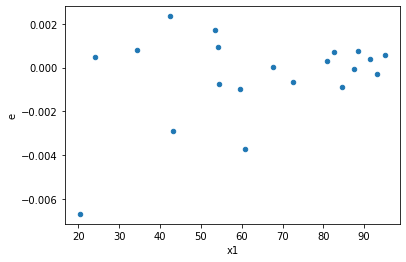

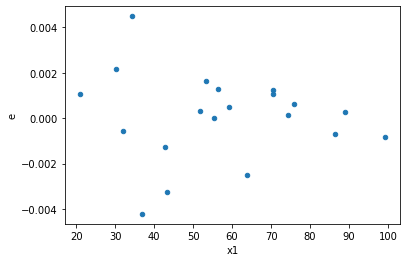

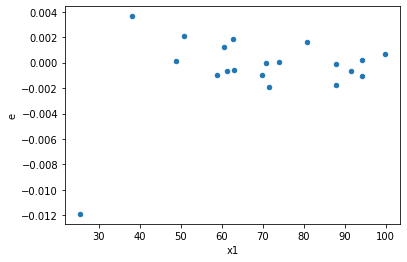

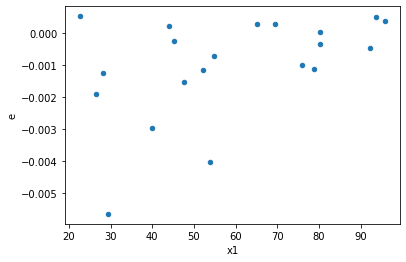

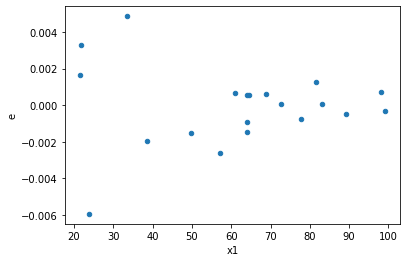

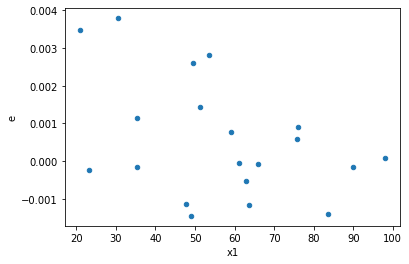

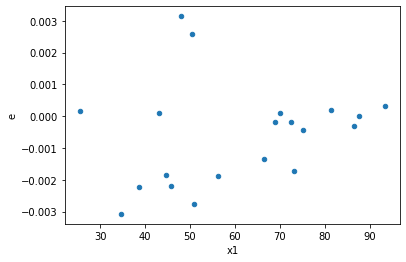

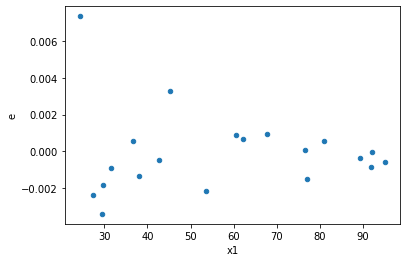

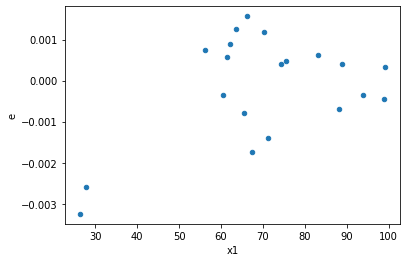

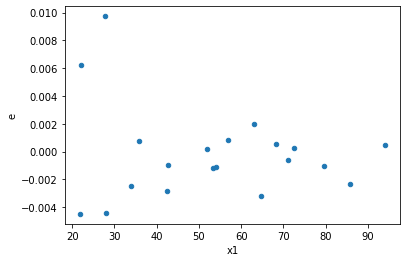

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
535.0,7.0,7.0,6.1029620949938456e-06,6.497436269185691e-06,8.718517278562637e-07,9.282051813122416e-07,1.064636510607763,0.9362750205071126,0.5318624897464437,0.4681375102535563,Reject005=1 : Homoscedasticity
545.0,7.0,7.0,3.283215815660857e-06,9.475112697163882e-06,4.6903083080869386e-07,1.3535875281662689e-06,2.8859244195790703,0.18539331493623434,0.9073033425318828,0.09269665746811717,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,4.272673943636744e-05,3.7112828372749785e-06,6.103819919481063e-06,5.301832624678541e-07,0.08686089522000993,0.004580650737965105,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,4.705256739538524e-05,9.378642507321165e-06,6.7217953421978915e-06,1.339806072474452e-06,0.19932265180158884,0.049427338417082835,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,0.00011249503875364091,3.246572069229411e-06,1.60707198219487e-05,4.637960098899159e-07,0.02885969110459403,0.00013031305576445123,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,2.6735280768378172e-05,1.9432916053682623e-05,3.819325824054024e-06,2.7761308648118033e-06,0.7268641097148079,0.6844234716724702,Reject005=1 : Homoscedasticity
4.0,7.0,7.0,1.7931940943322456e-05,3.4427843864852417e-06,2.5617058490460654e-06,4.918263409264631e-07,0.19199173125579996,0.04479447787252839,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,5.714102527037839e-05,4.2615261767919875e-06,8.163003610054055e-06,6.087894538274267e-07,0.07457909893333924,0.0028566446469998697,Reject005=0 : Heteroscedasticity
6.0,7.0,7.0,3.480238008217233e-05,4.209204403760351e-06,4.971768583167476e-06,6.013149148229073e-07,0.12094587766187101,0.012355344325125197,Reject005=0 : Heteroscedasticity
7.0,7.0,7.0,0.00012955660169490708,2.0103351503239756e-06,1.8508085956415298e-05,2.871907357605679e-07,0.0155170413859582,1.5943861121649657e-05,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,0.000102205479497356,8.768737204532772e-06,1.4600782785336572e-05,1.2526767435046818e-06,0.08579517700672414,0.004410235334675386,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    885
Reject005=1 : Homoscedasticity      115
Name: Result_test, dtype: int64